Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\navee\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [ ]:
pip install imgaug

In [11]:
pip install albumentations

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     -------------------------------------- 149.4/149.4 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/81.4 kB ? eta -:--:--
     ---------------------------------------- 81.4/81.4 kB ? eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/225.8 kB ? eta -:--:--
   ---------------------------------------- 225.8/225.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.7/38.8 MB 20.5 MB/s eta 0:00:02
   --- ------------------------------------ 3.0/38.8 MB 37.9 MB/s eta 0:00:01
   ----- --------------------------

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\navee\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\navee\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [18]:
import cv2
import numpy as np
import os
from glob import glob

# Paths for train, validation, and test datasets
train_path = 'C:/Users/navee/OneDrive/Desktop/Minor-3/Side Scan Sonar/train/images'
val_path = 'C:/Users/navee/OneDrive/Desktop/Minor-3/Side Scan Sonar/valid/images'
test_path = 'C:/Users/navee/OneDrive/Desktop/Minor-3/Side Scan Sonar/test/images'
output_path = 'C:/Users/navee/OneDrive/Desktop/Minor-3/Side Scan Sonar/Pre-processed'

# Function to apply random rotation
def random_rotation(image):
    angle = np.random.uniform(-10, 10)  # Rotate between -10 and 10 degrees
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

# Function to adjust brightness and contrast
def random_brightness_contrast(image):
    alpha = np.random.uniform(0.8, 1.2)  # Contrast control
    beta = np.random.randint(-30, 30)    # Brightness control
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Function to add Gaussian noise
def add_gaussian_noise(image):
    mean = 0
    sigma = np.random.uniform(10, 50)
    gauss = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy = cv2.add(image, gauss)
    return noisy

# Function to apply CLAHE (histogram equalization)
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized = clahe.apply(image)
    return equalized

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    images = glob(os.path.join(input_dir, '*.jpg'))  # Change to .png if necessary
    
    for img_path in images:
        # Read image
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        
        # Apply histogram equalization
        equalized_image = cv2.equalizeHist(image)
        
        # Apply augmentations
        rotated_image = random_rotation(equalized_image)
        adjusted_image = random_brightness_contrast(rotated_image)
        noisy_image = add_gaussian_noise(adjusted_image)
        final_image = apply_clahe(noisy_image)
        
        # Save processed image
        filename = os.path.basename(img_path)
        cv2.imwrite(os.path.join(output_dir, filename), final_image)

# Preprocess train, validation, and test images
preprocess_images(train_path, os.path.join(output_path, 'train'))
preprocess_images(val_path, os.path.join(output_path, 'val'))
preprocess_images(test_path, os.path.join(output_path, 'test'))


In [ ]:
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [18]:
import cv2
import numpy as np
from IPython.display import display, Image
from PIL import Image as PILImage
import matplotlib.pyplot as plt

In [ ]:
import cv2
import numpy

input_image = cv2.imread('C:/Users/navee/OneDrive/Deskto/Minor-3/Side Scan Sonar/train/images/ship-009_png.rf.3a1f48e60491254df609bd7b0bfeb9f5.jpg')
height, width, _ = input_image.shape

# Create a blob from the input image
blob = cv2.dnn.blobFromImage(input_image, 1/255, (416, 416), (0,0,0), True, crop=False)

# Set the input blob for the YOLO model
net.setInput(blob)

In [ ]:
input_image = cv2.imread('C:/Users/navee/OneDrive/Deskto/Minor-3/Side Scan Sonar/train/images/ship-009_png.rf.3a1f48e60491254df609bd7b0bfeb9f5.jpg')

# Get the height and width of the input image
height, width, _ = input_image.shape

# Create a blob from the input image
blob = cv2.dnn.blobFromImage(input_image, 1/255, (416, 416), (0,0,0), True, crop=False)

# Set the input blob for the YOLO model
net.setInput(blob)

# Run the YOLO model
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outputs = net.forward(output_layers)

# Create a copy of the input image for the output
output_image = input_image.copy()

# Perform object detection
class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Draw the bounding boxes on the output image
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(output_image, label + " " + confidence, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Create a horizontal stack of the input and output images
stacked_image = np.hstack((input_image, output_image))


In [ ]:
# Display the stacked image
cv2.imshow('Input and Output', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the stacked image to a file
cv2.imwrite('output.jpg', stacked_image)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

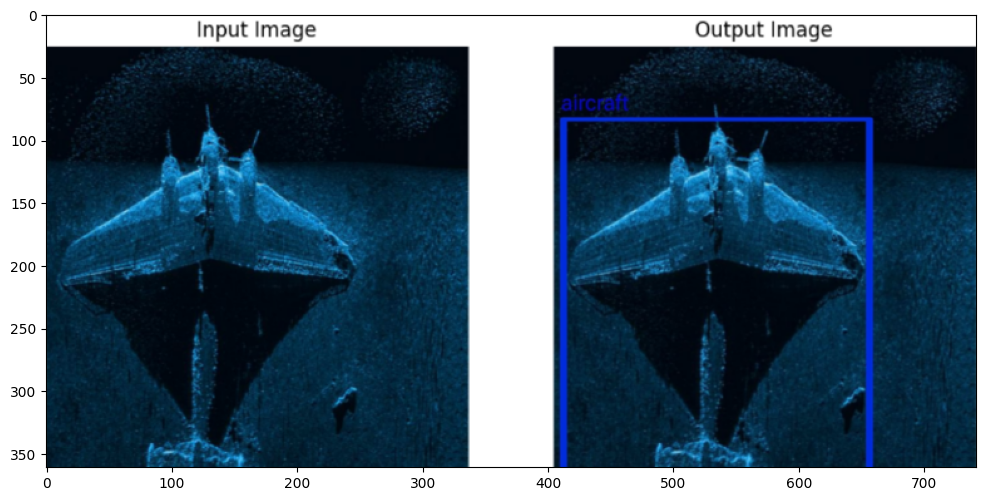

In [19]:
# Load the images
image1_path = 'C:/Users/navee/OneDrive/Desktop/Minor-3/YOLO.png'

image1 = cv2.imread(image1_path)

# Check if the images were loaded successfully
if image1 is None:
    print(f"Error: Unable to load image file '{image1_path}'")
    exit()
if image2 is None:
    print(f"Error: Unable to load image file '{image2_path}'")
    exit()

# Get the height and width of the images
height1, width1, _ = image1.shape

# Resize the images to the same height if necessary
if height1 != height2:
    scale = height1 / height2
    image2 = cv2.resize(image2, (int(width2 * scale), height1))

# Create a horizontal stack of the images
stacked_image = np.hstack((image1, image2))

# Convert the stacked image to RGB format
stacked_image = cv2.cvtColor(stacked_image, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Display the input image
plt.imshow(image1)
plt.set_title('')
plt.axis('off')

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()
